In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
# Read the Data
data=pd.read_csv('covid19_italy_region.csv', encoding= 'unicode_escape')

In [3]:
# top 5 rows in the dataset
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [6]:
#Checking the No. of Columns and Rows
data.shape

(3108, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        3108 non-null   int64  
 1   Date                       3108 non-null   object 
 2   Country                    3108 non-null   object 
 3   RegionCode                 3108 non-null   int64  
 4   RegionName                 3108 non-null   object 
 5   Latitude                   3108 non-null   float64
 6   Longitude                  3108 non-null   float64
 7   HospitalizedPatients       3108 non-null   int64  
 8   IntensiveCarePatients      3108 non-null   int64  
 9   TotalHospitalizedPatients  3108 non-null   int64  
 10  HomeConfinement            3108 non-null   int64  
 11  CurrentPositiveCases       3108 non-null   int64  
 12  NewPositiveCases           3108 non-null   int64  
 13  Recovered                  3108 non-null   int64

In [8]:
data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.00000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,1953.000000
mean,1553.500000,11.857143,43.046293,12.225955,527.07722,59.854569,586.931789,1753.718468,2340.650257,78.721364,4597.506113,1113.898327,8052.054698,117393.804916
std,897.346644,6.274808,2.489181,2.659376,1437.53924,152.166329,1584.130509,3837.856045,5158.491779,217.587189,10065.268025,2846.591952,16284.323701,122924.882678
min,0.000000,1.000000,38.115697,7.320149,0.00000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.000000,3482.000000
25%,776.750000,7.000000,41.125596,11.121231,13.00000,1.000000,14.000000,70.750000,95.000000,1.000000,113.000000,35.750000,781.000000,38202.000000
50%,1553.500000,12.000000,43.616760,12.388247,85.00000,9.000000,97.000000,414.000000,539.000000,9.000000,1085.500000,272.000000,2819.500000,71118.000000
75%,2330.250000,17.000000,45.434905,13.768136,349.00000,48.000000,405.250000,1522.500000,1997.750000,56.000000,3857.750000,795.000000,6785.000000,154665.000000
max,3107.000000,22.000000,46.499335,16.867367,12077.00000,1381.000000,13328.000000,30382.000000,37307.000000,3251.000000,71611.000000,16796.000000,95548.000000,724365.000000


In [4]:
#missing values
data.isna().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [13]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

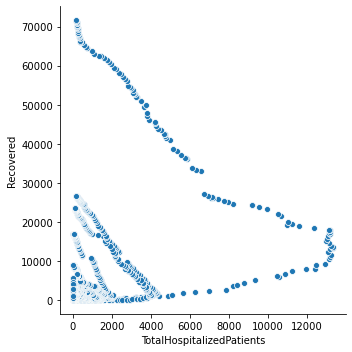

In [14]:
sns.relplot(x='TotalHospitalizedPatients', y='Recovered',data=data)

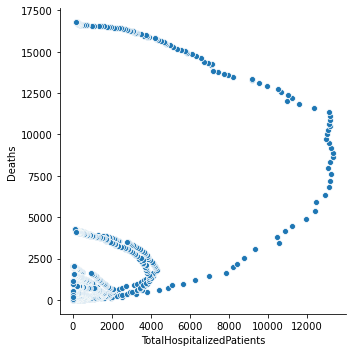

In [15]:
sns.relplot(x='TotalHospitalizedPatients', y='Deaths',data=data)

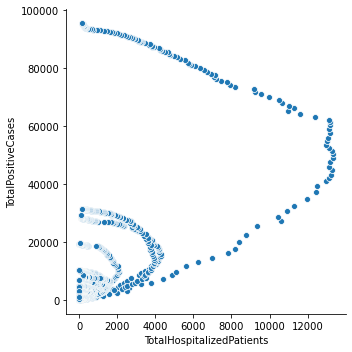

In [23]:
sns.relplot(x='TotalHospitalizedPatients', y='TotalPositiveCases',data=data)

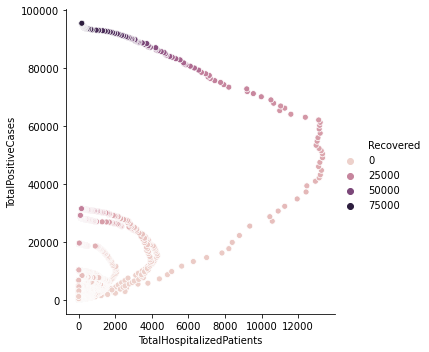

In [22]:
sns.relplot(x='TotalHospitalizedPatients', y='TotalPositiveCases',hue='Recovered',data=data)

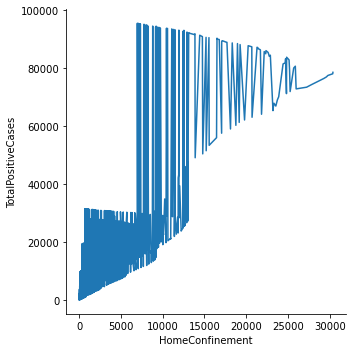

In [27]:
sns.relplot(x='HomeConfinement', y='TotalPositiveCases',kind='line', data=data)

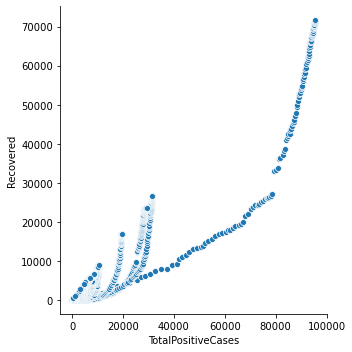

In [30]:
sns.relplot(x='TotalPositiveCases', y='Recovered', data=data)